In [26]:
import pandas as pd 
import numpy as pn 

In [27]:
df = pd.read_csv('./train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [28]:
df.fillna(df.mean , inplace=True)

df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [29]:
column = df.columns.tolist()
column

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [30]:
X = df[['battery_power',
'blue',
'clock_speed',
'dual_sim',
'fc',
'four_g',
'int_memory',
'm_dep',
'mobile_wt',
'n_cores',
'pc',
'px_height',
'px_width',
'ram',
'sc_h',
'sc_w',
'talk_time',
'three_g',
'touch_screen',
'wifi']].values

X


array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [31]:
y = df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [34]:
from sklearn.metrics import accuracy_score , precision_score , recall_score


def calculate_metrics (y_train , y_test , y_pred_train , y_pred_test):
    acc_train=accuracy_score(y_true=y_train , y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test , y_pred=y_pred_test)
    
    
    
    print(f"acc train : {acc_train}   , acc_test : {acc_test}")
    
    return acc_train , acc_test

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy' , max_depth= 16 , random_state=42)
dt.fit(X_train, y_train)

y_pred_train=dt.predict(X_train)
y_pred_test=dt.predict(X_test)


In [36]:
acc_train_dt , acc_test_dt = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)
acc_train_dt , acc_test_dt

acc train : 1.0   , acc_test : 0.85


(1.0, 0.85)

# ANN

In [37]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier(hidden_layer_sizes=128 , max_iter=200 , random_state=42)
ann.fit(X_train , y_train)

y_pred_train=ann.predict(X_train)
y_pred_test=ann.predict(X_test)

acc_train_ann , acc_test_ann = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)
acc_train_ann , acc_test_ann

acc train : 0.98625   , acc_test : 0.9575


c:\Users\microsoft\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.98625, 0.9575)

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3 , algorithm='kd_tree' , leaf_size=28)
knn.fit(X_train,y_train)

y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

acc_train_knn , acc_test_knn = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)
acc_train_knn , acc_test_knn

acc train : 0.651875   , acc_test : 0.385


(0.651875, 0.385)

# Random Forrest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500 , max_depth=64 , min_samples_split=2)
rf.fit(X_train , y_train)

y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

acc_train_rf , acc_test_rf = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)
acc_train_rf , acc_test_rf

acc train : 1.0   , acc_test : 0.895


(1.0, 0.895)

Now read test data

In [40]:
test=pd.read_csv('./test.csv')
test.shape

(1000, 21)

In [41]:
df.shape

(2000, 21)

In [42]:
test=test.drop('id' , axis=1)

In [43]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [44]:
test.shape

(1000, 20)

In [45]:
x_test = test[['battery_power',
'blue',
'clock_speed',
'dual_sim',
'fc',
'four_g',
'int_memory',
'm_dep',
'mobile_wt',
'n_cores',
'pc',
'px_height',
'px_width',
'ram',
'sc_h',
'sc_w',
'talk_time',
'three_g',
'touch_screen',
'wifi']].values

x_test


array([[1.043e+03, 1.000e+00, 1.800e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.410e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.807e+03, 1.000e+00, 2.800e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.185e+03, 0.000e+00, 1.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.533e+03, 1.000e+00, 5.000e-01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.270e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [46]:
x_test=scaler.fit_transform(x_test)

In [47]:
x_test

array([[0.36224149, 1.        , 0.52      , ..., 0.        , 1.        ,
        0.        ],
       [0.22748499, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.87191461, 1.        , 0.92      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.45697131, 0.        , 0.36      , ..., 1.        , 0.        ,
        0.        ],
       [0.68912608, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.51367578, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [48]:
predict_test_file = ann.predict(x_test)
predict_test_file

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 2, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 1, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

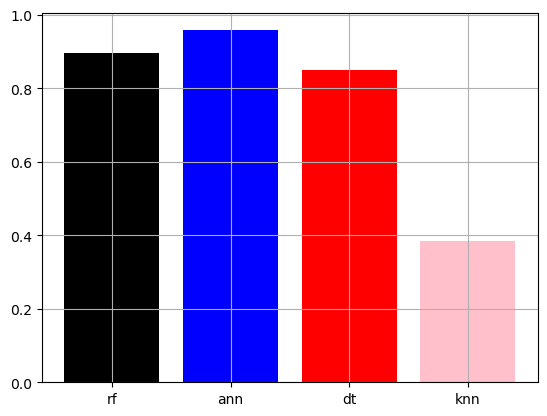

In [60]:
import matplotlib.pyplot as plt 

title = ['rf' , 'ann' , 'dt' , 'knn']
acc_test = [acc_test_rf , acc_test_ann , acc_test_dt , acc_test_knn]

color = ['black' , 'blue' , 'red' , 'pink']

plt.bar(title , acc_test , color=color)
plt.grid()
plt.show


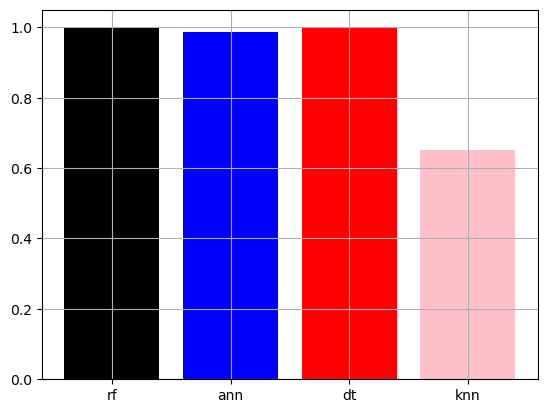

In [61]:
acc_train = [acc_train_rf , acc_train_ann , acc_train_dt , acc_train_knn]

plt.bar(title , acc_train , color=color)
plt.grid()
plt.show()